# XXX - Finanacial Case Study 

TASK

														
Task 1:	Using tab 1. CAC, calculate the average Customer Acquistion Cost (CAC) per country for the years 2017, 2018 and 2019 YTD. Rank them low to high. 													
														
Task 2: 	Using tab 2. RAW DATA USERS, prepare a cohort view of "Percentage of Active Users of Total Users".													
Task 2.1: 	Using tab 2. RAW DATA USERS, prepare list of average activity rates for the years 2017, 2018 and 2019 YTD. Rank them low to high.													
Task 2.2: 	Using tab 1. CAC and tab 2. RAW DATA USERS, which country has the most active users in their June 2019 cohort. Rank them low to high.													
														
Task 3: 	Using tab 3. RAW DATA TRX, prepare a cohort view of "Card Transaction Volume p. Active User".													
Task 3.1: 	Using tab 3. RAW DATA TRX, prepare list of average Card Transaction Volumes per Active User for the years 2017, 2018 and 2019 YTD. Rank them low to high.													
Task 3.2: 	Using the results from Task 2.2, which country had the highest card transaction volume in their June 2019 cohort. Rank them low to high.													
														
Task 4: 	Using tab 4. RAW DATA AUM, prepare a cohort view of "Avg. Balance per Active User".													
Task 4.1: 	Using tab 4. RAW DATA AUM, prepare list of average Avg. Balances per Active User for the years 2017, 2018 and 2019 YTD. Rank them low to high.													
Task 4.2: 	Using the results from Task 2.2, which country had the overall highest account balance in their June 2019 cohort. Rank them low to high.													
														
Task 5:	Using the results of tasks 1 through 4, calculate the payback period of each country, on a sign up basis,  for the June 2019 cohort. Rank them low to high. 													
N.B.	Assume that all card transactions are those of consumers within their own country and denomination (0,2% Interchange) and the interest rates of the local national banks apply to the account balances. 													
														
Task 6:	Prepare a seperate presentation with your findings for each task and make a recommendation on which country XXX should focus on acquiring customers from based on the payback period. 



## Data Loading

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df1= pd.read_csv('task1.csv')
df2= pd.read_csv('task2.csv')
df3= pd.read_csv('task3.csv')
df4= pd.read_csv('task4.csv')

"""
ASSUMPTIONS:

1:
All values are the same currency.



## Task 1


#ASSUMPTIONS:

Customer react fast after marketing impression, so there is no time lag between marketing impression and sign-up.
To put it differently, all monthly signups are attributed to the marketing costs for the same month. Given XXX business model and fast sign up process, this simplification/ assumption seems reasonable.


In [123]:
#marketing costs per year
marketing_cost=df1.iloc[0:6, 0:32]
marketing_cost=marketing_cost.set_index('Marketing Cost').transpose()
marketing_cost=marketing_cost.astype('int')
L=[]
for e in marketing_cost.index:
    L.append(e[0:4])
marketing_cost['year']=L
marketing_costs_year=marketing_cost.groupby('year').sum()
marketing_costs_year

Marketing Cost,DEU,AUT,FRA,ITA,ESP,GBR
year,,,,,,
2017,36490399,2980498,31835071,6413131,2827135,0
2018,121099477,10818756,96698494,62191952,36804899,21275184
2019,67316038,6142902,86677425,52712484,33713002,61957988


In [124]:
#signups per year
sign_ups=df1.iloc[8:14, 0:32]
sign_ups=sign_ups.set_index('Marketing Cost').transpose()
sign_ups=sign_ups.astype('int')
L=[]
for e in sign_ups.index:
    L.append(e[0:4])
sign_ups['year']=L
signups_year=sign_ups.groupby('year').sum()
signups_year

Marketing Cost,DEU,AUT,FRA,ITA,ESP,GBR
year,,,,,,
2017,815379,98906,874714,188239,121798,0
2018,1596086,179849,2241895,1315034,671330,426553
2019,1118320,135549,1776759,957068,542539,1168911


In [125]:
#divide marketing costs by number of newly aquired users
signups_year.loc['2017', 'GBR'] = 1
marketing_costs_year.loc['2017', 'GBR'] = 1
cost_per_aquisition_yty = marketing_costs_year.div(signups_year.values)
cost_per_aquisition_yty.loc['2017', 'GBR'] =0
cost_per_aquisition_yty=cost_per_aquisition_yty.transpose()
cost_per_aquisition_yty.index.name = ''
cost_per_aquisition_yty['Country']=cost_per_aquisition_yty.index
#print data ordered and by each of the three years 2017, 2018, 2019

### Average CAC 2017

In [126]:
_2017=cost_per_aquisition_yty[[ 'Country','2017']].sort_values(by=['2017'], ascending=False)
s = pd.Series([1, 2, 3, 4, 5, 6])
_2017=_2017.set_index([s])
del _2017.columns.name
_2017

,Country,2017
1,DEU,44.752684
2,FRA,36.394834
3,ITA,34.069088
4,AUT,30.134653
5,ESP,23.211670
6,GBR,0.000000


### Average CAC 2018

In [127]:
_2018=cost_per_aquisition_yty[['Country','2018']].sort_values(by=['2018'], ascending=False)
_2018=_2018.set_index([s])
del _2018.columns.name
_2018

,Country,2018
1,DEU,75.872777
2,AUT,60.154663
3,ESP,54.823856
4,GBR,49.877000
5,ITA,47.293037
6,FRA,43.132481


### Average CAC 2019 YTD

In [128]:
_2019=cost_per_aquisition_yty[['Country','2019']].sort_values(by=['2019'], ascending=False)
_2019=_2019.set_index([s])
del _2019.columns.name
_2019

,Country,2019
1,ESP,62.139315
2,DEU,60.193896
3,ITA,55.077052
4,GBR,53.004881
5,FRA,48.784008
6,AUT,45.318682


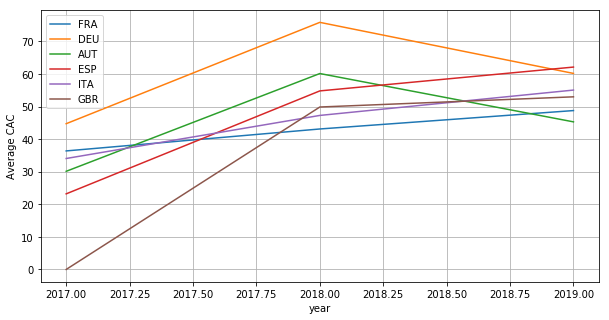

In [129]:
#NOT PART OF THE NUMERCAL SOLUTION ONLY FOR GRAPH PURPOSES FOR THE PRESENTATION
graph0=_2017.merge(_2018, on='Country').merge(_2019, on='Country')
x=graph0.transpose()
x=x.rename(columns=x.iloc[0]).iloc[1:]
x['year']=[2017, 2018, 2019]
x.plot(x='year', y=['FRA', 'DEU', 'AUT','ESP','ITA', 'GBR'], figsize=(10,5), grid=True)
plt.ylabel('Average CAC')
plt.show()

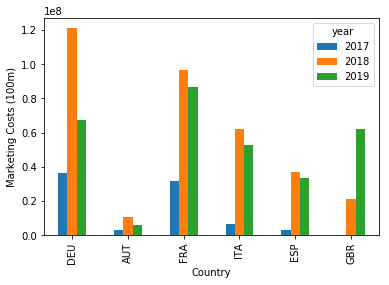

In [130]:
#NOT PART OF THE NUMERCAL SOLUTION ONLY FOR GRAPH PURPOSES FOR THE PRESENTATION
MC_graph=marketing_costs_year.transpose()
MC_graph['Country']=MC_graph.index
MC_graph.plot(x ='Country', y=['2017', '2018', '2019'], kind = 'bar')
plt.ylabel('Marketing Costs (100m)')
plt.show()

In [131]:
#NOT PART OF THE NUMERCAL SOLUTION ONLY FOR GRAPH PURPOSES FOR THE PRESENTATION
MC_graph

year,2017,2018,2019,Country
,,,,
DEU,36490399,121099477,67316038,DEU
AUT,2980498,10818756,6142902,AUT
FRA,31835071,96698494,86677425,FRA
ITA,6413131,62191952,52712484,ITA
ESP,2827135,36804899,33713002,ESP
GBR,1,21275184,61957988,GBR


Text(0,0.5,'Marketing Costs (100m)')

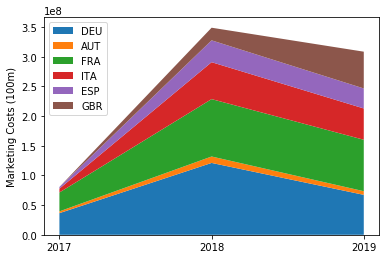

In [132]:
#NOT PART OF THE NUMERCAL SOLUTION ONLY FOR GRAPH PURPOSES FOR THE PRESENTATION
x=['2017', '2018', '2019']
yp=MC_graph.drop(['Country'], axis=1)
y1=list(yp.loc['DEU'])
y2=list(yp.loc['AUT'])
y3=list(yp.loc['FRA'])
y4=list(yp.loc['ITA'])
y5=list(yp.loc['ESP'])
y6=list(yp.loc['GBR'])
plt.stackplot(x,[y1, y2,y3,y4,y5,y6], labels=['DEU','AUT','FRA','ITA','ESP','GBR'])
plt.legend(loc='upper left')
plt.ylabel('Marketing Costs (100m)')

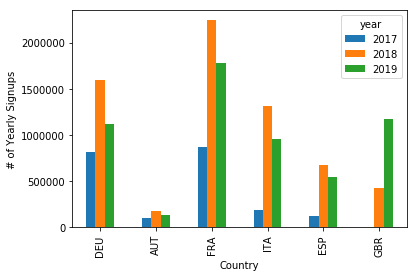

In [133]:
#NOT PART OF THE NUMERCAL SOLUTION ONLY FOR GRAPH PURPOSES FOR THE PRESENTATION
SU_graph=signups_year.transpose()
SU_graph['Country']=SU_graph.index
SU_graph.plot(x ='Country', y=['2017', '2018', '2019'], kind = 'bar')
plt.ylabel('# of Yearly Signups')
plt.show()

Text(0,0.5,'# of Yearly Signups')

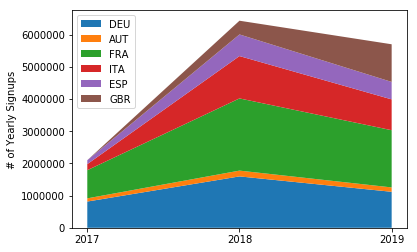

In [134]:
#NOT PART OF THE NUMERCAL SOLUTION ONLY FOR GRAPH PURPOSES FOR THE PRESENTATION
x=['2017', '2018', '2019']
yp=SU_graph.drop(['Country'], axis=1)
y1=list(yp.loc['DEU'])
y2=list(yp.loc['AUT'])
y3=list(yp.loc['FRA'])
y4=list(yp.loc['ITA'])
y5=list(yp.loc['ESP'])
y6=list(yp.loc['GBR'])
plt.stackplot(x,[y1, y2,y3,y4,y5,y6], labels=['DEU','AUT','FRA','ITA','ESP','GBR'])
plt.legend(loc='upper left')
plt.ylabel('# of Yearly Signups')

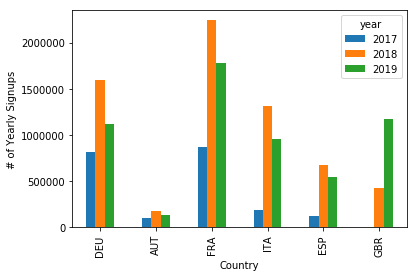

In [135]:
#NOT PART OF THE NUMERCAL SOLUTION ONLY FOR GRAPH PURPOSES FOR THE PRESENTATION
SU_graph=signups_year.transpose()
SU_graph['Country']=SU_graph.index
SU_graph.plot(x ='Country', y=['2017', '2018', '2019'], kind = 'bar')
plt.ylabel('# of Yearly Signups')
plt.show()

## Task 2.1

### Percentage of Active Users out of Total Users 2017

In [136]:
# select out of the all data the 12 elapsed months of 2017, sort the relevant data and print it
df2 = df2.sort_values(['Country','Months elapsed'])
s1=pd.Series([1, 2, 3, 4, 5])
L1=[]
for e in df2['Active']:
    L1.append((e*100))
df2['Active_Percentage']=L1
_2017_21=df2[(df2.Date=='2017-01') & (df2['Date Number']=='2017-12')].sort_values(by=['Active_Percentage'], ascending=False).set_index([s1])
AR2017=_2017_21[['Country', 'Active_Percentage']]
AR2017

,Country,Active_Percentage
1,FRA,96.107520
2,DEU,85.152385
3,AUT,74.218768
4,ESP,43.237119
5,ITA,30.844548


### Percentage of Active Users of Total Users 2018

In [137]:
# select out of the all data the 12 elapsed months of 2018, sort the relevant data and print it
_2018_21=df2[(df2.Date=='2018-01') & (df2['Date Number']=='2018-12')].sort_values(by=['Active_Percentage'], ascending=False).set_index([s1])
AR2018=_2018_21[['Country', 'Active_Percentage']]
AR2018

,Country,Active_Percentage
1,AUT,88.271501
2,DEU,85.183216
3,FRA,67.937564
4,ITA,62.997198
5,ESP,44.170750


### Percentage of Active Users of Total Users  2019 YTD

In [138]:
# select out of the all data the 6 elapsed months of 2019, sort the relevant data and print it
_2019_21=df2[(df2.Date=='2019-01') & (df2['Date Number']=='2019-06')].sort_values(by=['Active_Percentage'], ascending=False).set_index([s])
AR2019=_2019_21[['Country', 'Active_Percentage']]
AR2019

,Country,Active_Percentage
1,DEU,86.131709
2,AUT,72.496420
3,FRA,57.572641
4,ITA,47.521761
5,ESP,41.771269
6,GBR,33.805860


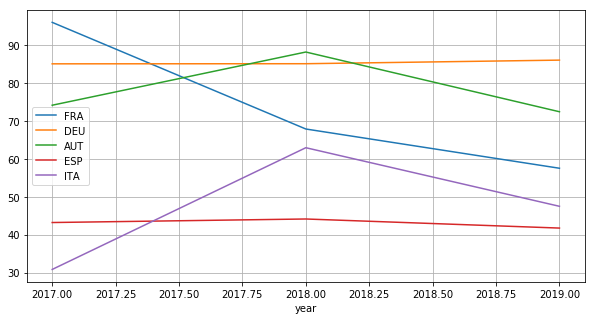

In [139]:
#NOT PART OF THE NUMERCAL SOLUTION ONLY FOR GRAPH PURPOSES FOR THE PRESENTATION
graph1=AR2017.merge(AR2018, on='Country').merge(AR2019, on='Country')
x=graph1.transpose()
x=x.rename(columns=x.iloc[0]).iloc[1:]
x['year']=[2017, 2018, 2019]
x.plot(x='year', y=['FRA', 'DEU', 'AUT','ESP','ITA'], figsize=(10,5), grid=True)

Text(0,0.5,'% of Total User Active')

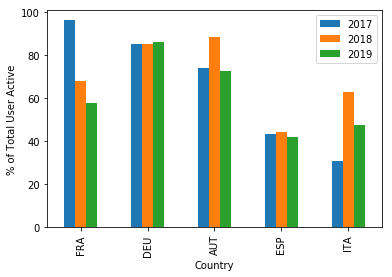

In [140]:
#NOT PART OF THE NUMERCAL SOLUTION ONLY FOR GRAPH PURPOSES FOR THE PRESENTATION
graph1=graph1.rename(columns = {"Active_Percentage_x": "2017", 
                  "Active_Percentage_y": "2018", 
                     "Active_Percentage":"2019"}, )
graph1.plot(x ='Country', y=['2017', '2018', '2019'], kind = 'bar', )
plt.ylabel('% of Total User Active')

## Task 2.2

"""
ASSUMPTIONS:

The activity rate of the entire user base for a country is proportinal/ representative for the activity rate of 
the newly signed cohort.
"""

### Number of Active Users in 2019-06 Cohort

In [141]:
# get the number of signups in 2019-06 and multiply it with the average activity rate, then rank the resulting table by the result
active_2019_06=df2[(df2.Date=='2019-06') & (df2['Date Number']=='2019-06')][['Country', 'Active']]
sign_ups_2019_06=sign_ups.loc[['2019-06']].transpose()
sign_ups_2019_06['Country']=sign_ups_2019_06.index
sign_ups_2019_06=sign_ups_2019_06.iloc[:6].sort_values(by=['Country'])
L2=[]
for e in sign_ups_2019_06['2019-06']:
    L2.append(float(e))
active_2019_06['nub_signups_2019_06']=L2
active_2019_06['active_2019_06_cohort']=active_2019_06.nub_signups_2019_06*(active_2019_06.Active)
result22=active_2019_06[['Country', 'active_2019_06_cohort']].sort_values(by=['active_2019_06_cohort'], ascending=False).set_index([s])
result22

,Country,active_2019_06_cohort
1,FRA,88767.122316
2,DEU,73479.271116
3,GBR,42670.945805
4,ITA,36923.404374
5,ESP,25786.246975
6,AUT,11040.236565


## Task 3.1

"""
ASSUMPTIONS:

The data for "Card Transaction Volume p. Active User" is not normalised to a common unit such as average transaction per month or per year. 
This is a reasonable assumption as the number deviates significatly with regard to the "months elapsed" variable. 

"""

### Average TX Volume 2017

In [142]:
# select out of the all data the 12 elapsed months of 2017, sort the relevant data and print it
df3 = df3.sort_values(['Country','Months elapsed'])
L3=[]
for e in df3['TX']:
    L3.append((e))
df3['Avg_TX']=L3
_2017_31=df3[(df3.Date=='2017-01') & (df3['Date Number']=='2017-12')].sort_values(by=['Avg_TX'], ascending=False).set_index([s1])
L31_2017=_2017_31[['Country', 'Avg_TX']]
L31_2017

,Country,Avg_TX
1,ITA,1993.621770
2,ESP,1669.089854
3,DEU,1293.760438
4,FRA,1093.743538
5,AUT,884.918184


### Average TX Volume 2018

In [143]:
# select out of the all data the 12 elapsed months of 2018, sort the relevant data and print it
_2018_31=df3[(df3.Date=='2018-01') & (df3['Date Number']=='2018-12')].sort_values(by=['Avg_TX'], ascending=False).set_index([s1])
L31_2018=_2018_31[['Country', 'Avg_TX']]
L31_2018

,Country,Avg_TX
1,DEU,1523.011507
2,ITA,1038.228777
3,FRA,984.346487
4,AUT,918.939921
5,ESP,731.666496


### Average TX Volume 2019 YTD

In [144]:
# select out of the all data the 6 elapsed months of 2019, sort the relevant data and print it
_2019_31=df3[(df3.Date=='2019-01') & (df3['Date Number']=='2019-06')].sort_values(by=['Avg_TX'], ascending=False).set_index([s])
L31_2019=_2019_31[['Country', 'Avg_TX']]
L31_2019

,Country,Avg_TX
1,DEU,1066.482133
2,AUT,742.828157
3,FRA,702.121338
4,ITA,552.854526
5,GBR,505.339586
6,ESP,481.166310


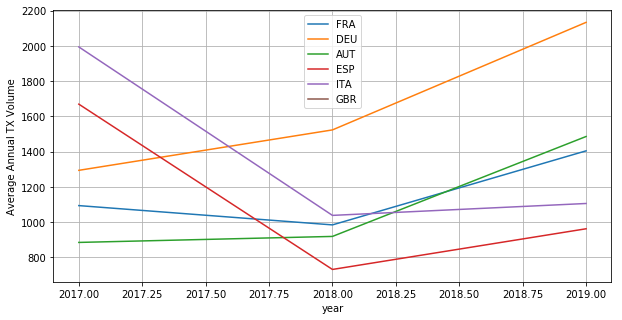

In [145]:
#NOT PART OF THE NUMERCAL SOLUTION ONLY FOR GRAPH PURPOSES FOR THE PRESENTATION
graph0=L31_2017.merge(L31_2018, on='Country').merge(L31_2019, on='Country', how ='outer')
graph0['Avg_TX']=graph0['Avg_TX']*2
x=graph0.transpose()
x=x.rename(columns=x.iloc[0]).iloc[1:]
x['year']=[2017, 2018, 2019]
x.plot(x='year', y=['FRA', 'DEU', 'AUT','ESP','ITA', 'GBR'], figsize=(10,5), grid=True)
plt.ylabel('Average Annual TX Volume')
plt.show()


## Task 3.2

"""
ASSUMPTIONS:

The average number of transaction of the entire user base for a country is proportinal/ representative for the average number of transaction of 
the newly signed cohort.

"""

### Total TX Volume 2019-06 Cohort in June 2019

In [146]:
table32=result22.sort_values(by=['Country'])
avg_tx_2019_06=df3[(df3.Date=='2019-06') & (df3['Date Number']=='2019-06')].sort_values(by=['Country'])
L4=[]
for e in avg_tx_2019_06['TX']:
    L4.append(float(e))
table32['TX']=L4
table32['TX_total']=(table32.active_2019_06_cohort*table32.TX)
result32=table32.sort_values(by=['TX_total'], ascending=False).set_index([s])[['Country', 'TX_total']]
result32.round()

,Country,TX_total
1,DEU,52124028.0
2,FRA,50242624.0
3,ITA,17314839.0
4,ESP,12422901.0
5,GBR,12135462.0
6,AUT,5084834.0


Text(0,0.5,'TX Volume in 10m')

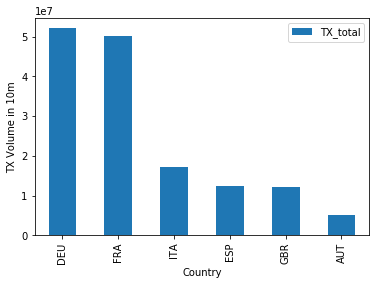

In [147]:
result32.plot(x ='Country', y=['TX_total'], kind = 'bar' )
plt.ylabel('TX Volume in 10m')

## Task 4.1

### Average AUM per active User 2017

In [148]:
# select out of the all data the 12 elapsed months of 2017, sort the relevant data and print it
df4 = df4.sort_values(['Country','Months elapsed'])
s1=pd.Series([1, 2, 3, 4, 5])
L5=[]
for e in df4['AUM']:
    L5.append(int(e))
df4['Avg_AUM']=L5
_2017_41=df4[(df4.Date=='2017-01') & (df4['Date Number']=='2017-12')].sort_values(by=['Avg_AUM'], ascending=False).set_index([s1])
L41_2017=_2017_41[['Country', 'Avg_AUM']]
L41_2017

,Country,Avg_AUM
1,AUT,2899
2,ITA,2864
3,DEU,2397
4,ESP,2390
5,FRA,1742


### Average AUM per active User 2018

In [149]:
# select out of the all data the 12 elapsed months of 2018, sort the relevant data and print it
_2018_41=df4[(df4.Date=='2018-01') & (df4['Date Number']=='2018-12')].sort_values(by=['Avg_AUM'], ascending=False).set_index([s1])
L41_2018=_2018_41[['Country', 'Avg_AUM']]
L41_2018

,Country,Avg_AUM
1,DEU,3245
2,ESP,2012
3,ITA,1835
4,AUT,1828
5,FRA,1520


### Average AUM per active User 2019 YTD

In [150]:
# select out of the all data the 6 elapsed months of 2019, sort the relevant data and print it
_2019_41=df4[(df4.Date=='2019-01') & (df4['Date Number']=='2019-06')].sort_values(by=['Avg_AUM'], ascending=False).set_index([s])
L41_2019=_2019_41[['Country', 'Avg_AUM']]
L41_2019

,Country,Avg_AUM
1,DEU,2049
2,AUT,1889
3,ESP,1241
4,ITA,956
5,FRA,898
6,GBR,306


In [151]:
#NOT PART OF THE NUMERCAL SOLUTION ONLY FOR GRAPH PURPOSES FOR THE PRESENTATION
graph5=L41_2017.merge(L41_2018, on='Country').merge(L41_2019, on='Country', how='outer')
graph5=graph5.rename(columns = {"Avg_AUM_x": "2017", 
                  "Avg_AUM_y": "2018", 
                     "Avg_AUM":"2019"}, )
graph5['2019']=graph5['2019']*2
graph5.index=graph5['Country']

graph5

,Country,2017,2018,2019
Country,,,,
AUT,AUT,2899.0,1828.0,3778
ITA,ITA,2864.0,1835.0,1912
DEU,DEU,2397.0,3245.0,4098
ESP,ESP,2390.0,2012.0,2482
FRA,FRA,1742.0,1520.0,1796
GBR,GBR,NaN,NaN,612


Text(0,0.5,'Average AUM per Active User')

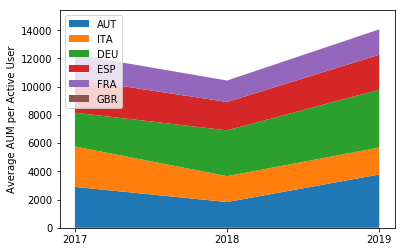

In [152]:
#NOT PART OF THE NUMERCAL SOLUTION ONLY FOR GRAPH PURPOSES FOR THE PRESENTATION
x=['2017', '2018', '2019']
yp=graph5.drop(['Country'], axis=1)
y1=list(yp.loc['AUT'])
y2=list(yp.loc['ITA'])
y3=list(yp.loc['DEU'])
y4=list(yp.loc['ESP'])
y5=list(yp.loc['FRA'])
y6=list(yp.loc['GBR'])
plt.stackplot(x,[y1, y2,y3,y4,y5,y6], labels=['AUT','ITA','DEU','ESP','FRA','GBR'])
plt.legend(loc='upper left')
plt.ylabel('Average AUM per Active User')

## Task 4.2

"""
ASSUMPTIONS:

The average AUM of the entire user base for a country is proportinal/ representative for the average AUM of 
the newly signed cohort. This is a very strong assumption, as I consider it likely that new customers start with a lower amount of
AUM compared to established customers who are familiar with the service.

"""

### Total AUM 2019-06 Cohort in June 2019

In [154]:
table42=result22.sort_values(by=['Country'])
avg_AUM_2019_06=df4[(df4.Date=='2019-06') & (df4['Date Number']=='2019-06')].sort_values(by=['Country'])
#spain has to be droped as the is no average AUM data for 2019-06 for spain, making assumption with previous data or average data would distort the result
table42 = table42.drop(5)
L6=[]
for e in avg_AUM_2019_06['AUM']:
    L6.append((e))
table42['AUM']=L6
table42['AUM_total']=(table42.active_2019_06_cohort*table42.AUM).round()
result42=table42.sort_values(by=['AUM_total'], ascending=False).set_index([s1])[['Country', 'AUM_total']]
result42

,Country,AUM_total
1,DEU,76447572.0
2,FRA,60589111.0
3,ITA,29172450.0
4,GBR,12004654.0
5,AUT,8438850.0


Text(0,0.5,'AUM in 10m')

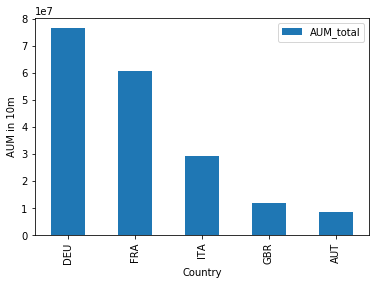

In [155]:
result42.plot(x ='Country', y=['AUM_total'], kind = 'bar' )
plt.ylabel('AUM in 10m')

## Task 5

"""
ASSUMPTIONS:

1:
It is assumed that the calculated values from 1-4 remain the same (cetris paribus) in the future. 

2: 
It is assumed when calculating the payback period that interest rates are seen as a cost position for N26 that 
has to be paid to customers: However, the AUM and the interest rates could not only be seen as a 
cost position but also be used for revenue generating activities such as issuing loans. However, this was disregarded for the following calulations.

3:
For Spain the was not data with regard to "Avg. Balance p. Active User" for the period 2019-06 one month! As imputing the value by means of past data or average current data seems to strong of an assumption that would potentially distort the results, Spain was disregarded for the final analysis
"""

In [157]:
#prepare all the data to merge
#average customer aquisition cost 2019 per country
a=_2019.sort_values(by=['Country'])
#active user cohort 2019-06 per country
b=result22.sort_values(by=['Country'])
#transaction Volume cohort 2019-06 per country
c=result32.sort_values(by=['Country'])
#AUM cohort 2019-06 per country
d=result42.sort_values(by=['Country'])

In [158]:
# add interest rates, rename columns where neccessary, add total sign ups 2019-06 and merge dataframe 
int_rate=[0,0,0,0,0.0075,0]
df5=a.merge(b, on='Country', how='left').merge(c, on='Country', how='left').merge(d, on='Country', how='left')
df5['interest_rate']=int_rate
df5['CAC2019']=df5['2019']
df5=df5.drop(['2019'], axis=1)

L7=[]
for e in sign_ups.loc['2019-06'].sort_index(axis = 0):
    L7.append(e)
df5['sign_ups']=L7[:-1]
df5

,Country,active_2019_06_cohort,TX_total,AUM_total,interest_rate,CAC2019,sign_ups
0,AUT,11040.236565,5.084834e+06,8438850.0,0.0000,45.318682,21033
1,DEU,73479.271116,5.212403e+07,76447572.0,0.0000,60.193896,160875
2,ESP,25786.246975,1.242290e+07,NaN,0.0000,62.139315,87941
3,FRA,88767.122316,5.024262e+07,60589111.0,0.0000,48.784008,266707
4,GBR,42670.945805,1.213546e+07,12004654.0,0.0075,53.004881,184882
5,ITA,36923.404374,1.731484e+07,29172450.0,0.0000,55.077052,128714


In [166]:
#calculations
#total costs
df5['total_costs']=df5.sign_ups*df5.CAC2019
#income from transactions
df5['Annual_revenue'] =df5.TX_total*0.002*12
#annual interest payable
df5['Annual_costs'] =df5.AUM_total*df5.interest_rate
#annual profit
df5['annual_profit'] =df5.Annual_revenue-df5.Annual_costs
#payback period
df5['payback_period'] =df5.total_costs/df5.annual_profit

In [167]:
df5

,Country,active_2019_06_cohort,TX_total,AUM_total,interest_rate,CAC2019,sign_ups,total_costs,Annual_revenue,Annual_costs,annual_profit,payback_period
0,AUT,11040.236565,5.084834e+06,8438850.0,0.0000,45.318682,21033,9.531878e+05,1.220360e+05,0.000,1.220360e+05,7.810709
1,DEU,73479.271116,5.212403e+07,76447572.0,0.0000,60.193896,160875,9.683693e+06,1.250977e+06,0.000,1.250977e+06,7.740906
2,ESP,25786.246975,1.242290e+07,NaN,0.0000,62.139315,87941,5.464594e+06,2.981496e+05,NaN,NaN,NaN
3,FRA,88767.122316,5.024262e+07,60589111.0,0.0000,48.784008,266707,1.301104e+07,1.205823e+06,0.000,1.205823e+06,10.790171
4,GBR,42670.945805,1.213546e+07,12004654.0,0.0075,53.004881,184882,9.799648e+06,2.912511e+05,90034.905,2.012162e+05,48.702087
5,ITA,36923.404374,1.731484e+07,29172450.0,0.0000,55.077052,128714,7.089188e+06,4.155561e+05,0.000,4.155561e+05,17.059519


### Payback Period

In [168]:
df5.sort_values(by=['payback_period'], ascending=True).set_index([s])[['Country','payback_period']]

,Country,payback_period
1,DEU,7.740906
2,AUT,7.810709
3,FRA,10.790171
4,ITA,17.059519
5,GBR,48.702087
6,ESP,NaN


'''COMMENT: for reasons of completness the final payback analysis was also run once with seeing interest rates as an addtional revenue generating option
and not as a cost position. In any case, the ranking of the countries does not change.

''''

In [169]:
#calculations
#total costs
df5['total_costs']=df5.sign_ups*df5.CAC2019
#income from transactions
df5['Annual_revenue'] =df5.TX_total*0.002*12
#annual interest payable
df5['Annual_costs'] =df5.AUM_total*df5.interest_rate
#annual profit
df5['annual_profit'] =df5.Annual_revenue+df5.Annual_costs
#payback period
df5['payback_period'] =df5.total_costs/df5.annual_profit

In [170]:
df5.sort_values(by=['payback_period'], ascending=True).set_index([s])[['Country','payback_period']]

,Country,payback_period
1,DEU,7.740906
2,AUT,7.810709
3,FRA,10.790171
4,ITA,17.059519
5,GBR,25.701569
6,ESP,NaN
